In [1]:
%matplotlib inline

# Principal Component Analysis

Implementation of Principal Component Analysis for dimensionality reduction

> from mlxtend.feature_extraction import PrincipalComponentAnalysis

## Overview

The sheer size of data in the modern age is not only a challenge for computer hardware but also a main bottleneck for the performance of many machine learning algorithms. The main goal of a PCA analysis is to identify patterns in data; PCA aims to detect the correlation between variables. If a strong correlation between variables exists, the attempt to reduce the dimensionality only makes sense. In a nutshell, this is what PCA is all about: Finding the directions of maximum variance in high-dimensional data and project it onto a smaller dimensional subspace while retaining most of the information.

### PCA and Dimensionality Reduction

Often, the desired goal is to reduce the dimensions of a $d$-dimensional dataset by projecting it onto a $(k)$-dimensional subspace (where $k\;<\;d$) in order to increase the computational efficiency while retaining most of the information. An important question is "what is the size of $k$ that represents the data 'well'?"

Later, we will compute eigenvectors (the principal components) of a dataset and collect them in a projection matrix. Each of those eigenvectors is associated with an eigenvalue which can be interpreted as the "length" or "magnitude" of the corresponding eigenvector. If some eigenvalues have a significantly larger magnitude than others that the reduction of the dataset via PCA onto a smaller dimensional subspace by dropping the "less informative" eigenpairs is reasonable.

### A Summary of the PCA Approach

-  Standardize the data.
-  Obtain the Eigenvectors and Eigenvalues from the covariance matrix or correlation matrix, or perform Singular Vector Decomposition.
-  Sort eigenvalues in descending order and choose the $k$ eigenvectors that correspond to the $k$ largest eigenvalues where $k$ is the number of dimensions of the new feature subspace ($k \le d$).
-  Construct the projection matrix $\mathbf{W}$ from the selected $k$ eigenvectors.
-  Transform the original dataset $\mathbf{X}$ via $\mathbf{W}$ to obtain a $k$-dimensional feature subspace $\mathbf{Y}$.


### References

- Pearson, Karl. "LIII. [On lines and planes of closest fit to systems of points in space.](http://www.tandfonline.com/doi/abs/10.1080/14786440109462720?journalCode=tphm17)" The London, Edinburgh, and Dublin Philosophical Magazine and Journal of Science 2.11 (1901): 559-572.

## Example 1 - PCA on Iris

In [2]:
from mlxtend.data import iris_data
from mlxtend.preprocessing import standardize
from mlxtend.feature_extraction import PrincipalComponentAnalysis

X, y = iris_data()
X = standardize(X)

pca = PrincipalComponentAnalysis(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

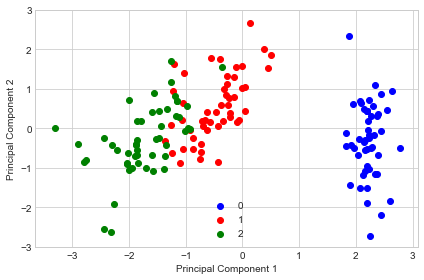

In [3]:
import matplotlib.pyplot as plt

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip((0, 1, 2),
                        ('blue', 'red', 'green')):
        plt.scatter(X_pca[y==lab, 0],
                    X_pca[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

## Example 2 - Plotting the Variance Explained Ratio

In [4]:
from mlxtend.data import iris_data
from mlxtend.preprocessing import standardize

X, y = iris_data()
X = standardize(X)

pca = PrincipalComponentAnalysis(n_components=None)
pca.fit(X)
X_pca = pca.transform(X)

In [5]:
import numpy as np

tot = sum(pca.e_vals_)
var_exp = [(i / tot)*100 for i in sorted(pca.e_vals_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

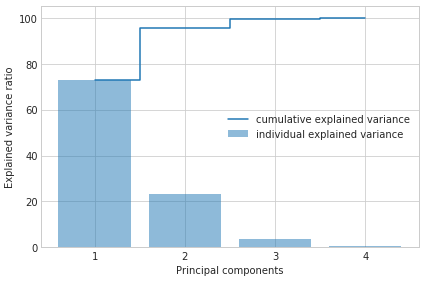

In [6]:
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(figsize=(6, 4))
    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.xticks(range(4))
    ax.set_xticklabels(np.arange(1, X.shape[1] + 1))
    plt.legend(loc='best')
    plt.tight_layout()

## Example 3 - PCA via SVD

While the eigendecomposition of the covariance or correlation matrix may be more intuitiuve, most PCA implementations perform a Singular Vector Decomposition (SVD) to improve the computational efficiency. Another advantage of using SVD is that the results tend to be more numerically stable, since we can decompose the input matrix directly without the additional covariance-matrix step.

In [7]:
from mlxtend.data import iris_data
from mlxtend.preprocessing import standardize
from mlxtend.feature_extraction import PrincipalComponentAnalysis

X, y = iris_data()
X = standardize(X)

pca = PrincipalComponentAnalysis(n_components=2,
                                 solver='svd')
pca.fit(X)
X_pca = pca.transform(X)

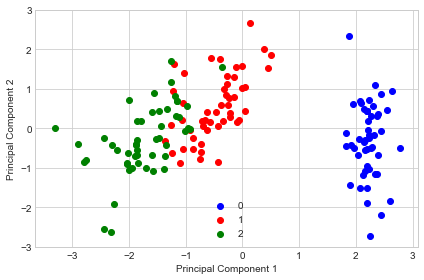

In [8]:
import matplotlib.pyplot as plt

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip((0, 1, 2),
                        ('blue', 'red', 'green')):
        plt.scatter(X_pca[y==lab, 0],
                    X_pca[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

If we compare this PCA projection to the previous plot in example 1, we notice that they are mirror images of each other. Note that this is not due to an error in any of those two implementations, but the reason for this difference is that, depending on the eigensolver, eigenvectors can have either negative or positive signs.

For instance, if $v$ is an eigenvector of a matrix $\Sigma$, we have

$$\Sigma v = \lambda v,$$

where $\lambda$ is our eigenvalue

then $-v$ is also an eigenvector that has the same eigenvalue, since

$$\Sigma(-v) = -\Sigma v = -\lambda v = \lambda(-v).$$

## Example 4 - Factor Loadings

After evoking the `fit` method, the factor loadings are available via the `loadings_` attribute. In simple terms, the loadings are the unstandardized values of the eigenvectors. Or in other words, we can interpret the loadings as the covariances (or correlation in case we standardized the input features) between the input features and the principal components (or eigenvectors), which have been scaled to unit length.

By having the loadings scaled, they become comparable by magnitude and we can assess how much variance in a component is attributed to the input features (as the components are  just a weighted linear combination of the input features).

In [9]:
from mlxtend.data import iris_data
from mlxtend.preprocessing import standardize
from mlxtend.feature_extraction import PrincipalComponentAnalysis
import matplotlib.pyplot as plt

X, y = iris_data()
X = standardize(X)

pca = PrincipalComponentAnalysis(n_components=2,
                                 solver='eigen')
pca.fit(X);

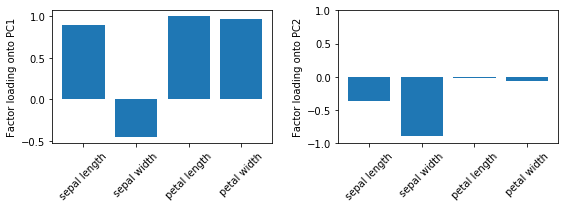

In [10]:
xlabels = ['sepal length', 'sepal width', 'petal length', 'petal width']

fig, ax = plt.subplots(1, 2, figsize=(8, 3))

ax[0].bar(range(4), pca.loadings_[:, 0], align='center')
ax[1].bar(range(4), pca.loadings_[:, 1], align='center')

ax[0].set_ylabel('Factor loading onto PC1')
ax[1].set_ylabel('Factor loading onto PC2')

ax[0].set_xticks(range(4))
ax[1].set_xticks(range(4))
ax[0].set_xticklabels(xlabels, rotation=45)
ax[1].set_xticklabels(xlabels, rotation=45)
plt.ylim([-1, 1])
plt.tight_layout()

For instance, we may say that most of the variance in the first component is attributed to the petal features (although the loading of sepal length on PC1 is also not much less in magnitude). In contrast, the remaining variance captured by PC2 is mostly due to the sepal width. Note that we know from Example 2 that PC1 explains most of the variance, and based on the information from the loading plots, we may say that petal features combined with sepal length may explain most of the spread in the data.

## Example 5 - Feature Extraction Pipeline

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mlxtend.data import wine_data

X, y = wine_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.3, stratify=y)

In [12]:
pipe_pca = make_pipeline(StandardScaler(),
                         PrincipalComponentAnalysis(n_components=3),
                         KNeighborsClassifier(n_neighbors=5))

pipe_pca.fit(X_train, y_train)


print('Transf. training accyracy: %.2f%%' % (pipe_pca.score(X_train, y_train)*100))
print('Transf. test accyracy: %.2f%%' % (pipe_pca.score(X_test, y_test)*100))

Transf. training accyracy: 96.77%
Transf. test accyracy: 96.30%


## Example 6 - Whitening

Certain algorithms require the data to be whitened. This means that the features have unit variance and the off-diagonals are all zero (i.e., the features are uncorrelated). PCA already ensures that the features are uncorrelated, hence, we only need to apply a simple scaling to whiten the transformed data.

For instance, for a given transformed feature $X'_i$, we divide it by the square-root of the corresponding eigenvalue $\lambda_i$:

$$X'_{\text{whitened}} = \frac{X'_i}{\sqrt{\lambda_i}}.$$

The whitening via the `PrincipalComponentAnalysis` can be achieved by setting `whitening=True` during initialization. Let's demonstrate that with an example.

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mlxtend.data import wine_data

X, y = wine_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.3, stratify=y)

### Regular PCA

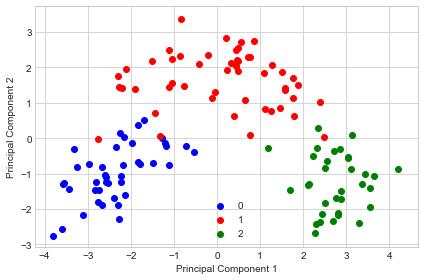

In [14]:
sc = StandardScaler()

pca1 = PrincipalComponentAnalysis(n_components=2)

X_train_scaled = sc.fit_transform(X_train)
X_train_transf = pca1.fit(X_train_scaled).transform(X_train_scaled)


with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip((0, 1, 2),
                        ('blue', 'red', 'green')):
        plt.scatter(X_train_transf[y_train==lab, 0],
                    X_train_transf[y_train==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [15]:
np.set_printoptions(precision=1, suppress=True)

print('Covariance matrix:\n')
np.cov(X_train_transf.T)

Covariance matrix:



array([[4.9, 0. ],
       [0. , 2.5]])

As we can see, the features are uncorrelated after transformation but don't have unit variance.

### PCA with Whitening

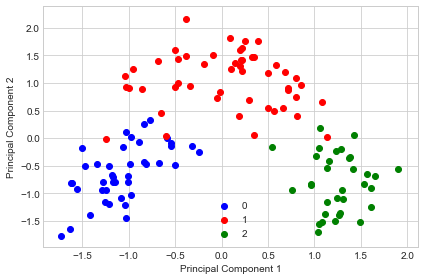

In [16]:
sc = StandardScaler()

pca1 = PrincipalComponentAnalysis(n_components=2, whitening=True)

X_train_scaled = sc.fit_transform(X_train)
X_train_transf = pca1.fit(X_train_scaled).transform(X_train_scaled)


with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip((0, 1, 2),
                        ('blue', 'red', 'green')):
        plt.scatter(X_train_transf[y_train==lab, 0],
                    X_train_transf[y_train==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [17]:
np.set_printoptions(precision=1, suppress=True)

print('Covariance matrix:\n')
np.cov(X_train_transf.T)

Covariance matrix:



array([[1., 0.],
       [0., 1.]])

As we can see above, the whitening achieves that all features now have unit variance. I.e., the covariance matrix of the transformed features becomes the identity matrix.

## API

In [18]:
with open('../../api_modules/mlxtend.feature_extraction/PrincipalComponentAnalysis.md', 'r') as f:
    s = f.read()
print(s)

## PrincipalComponentAnalysis

*PrincipalComponentAnalysis(n_components=None, solver='svd', whitening=False)*

Principal Component Analysis Class

**Parameters**

- `n_components` : int (default: None)

    The number of principal components for transformation.
    Keeps the original dimensions of the dataset if `None`.

- `solver` : str (default: 'svd')

    Method for performing the matrix decomposition.
    {'eigen', 'svd'}

- `whitening` : bool (default: False)

    Performs whitening such that the covariance matrix of
    the transformed data will be the identity matrix.

**Attributes**

- `w_` : array-like, shape=[n_features, n_components]

    Projection matrix

- `e_vals_` : array-like, shape=[n_features]

    Eigenvalues in sorted order.

- `e_vecs_` : array-like, shape=[n_features]

    Eigenvectors in sorted order.

- `e_vals_normalized_` :  array-like, shape=[n_features]

    Normalized eigen values such that they sum up to 1.
    This is equal to what's often referred to a